In [8]:
COMMON_PATH = "../MSAAI_501_Project_FacialEmotionDetection"

DATASET_PATH = fr"{COMMON_PATH}\Dataset"

TRAIN_10_PATH =fr"{COMMON_PATH}\train10"

TRAIN_20_PATH = fr"{COMMON_PATH}\train20"

TRAIN_30_PATH = fr"{COMMON_PATH}\train30"

TRAIN_50_PATH = fr"{COMMON_PATH}\train50"

In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n.pt")
results = model.train(
    data=fr"{DATASET_PATH}\YOLO_format\data.yaml",
    epochs=50,
    imgsz=640,
    device="0" 
)

In [9]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import numpy as np

# ============================
# YOUR DATASET PATH
# ============================
ROOT = fr"{DATASET_PATH}\YOLO_format"

TRAIN_IMG_DIR = os.path.join(ROOT, "train", "images")
TRAIN_LABEL_DIR = os.path.join(ROOT, "train", "labels")

VAL_IMG_DIR = os.path.join(ROOT, "valid", "images")
VAL_LABEL_DIR = os.path.join(ROOT, "valid", "labels")

In [10]:
CLASS_NAMES = {
    0: "Anger",
    1: "Contempt",
    2: "Disgust",
    3: "Fear",
    4: "Happy",
    5: "Neutral",
    6: "Sad",
    7: "Surprise"
}

CLASS_NAMES

{0: 'Anger',
 1: 'Contempt',
 2: 'Disgust',
 3: 'Fear',
 4: 'Happy',
 5: 'Neutral',
 6: 'Sad',
 7: 'Surprise'}

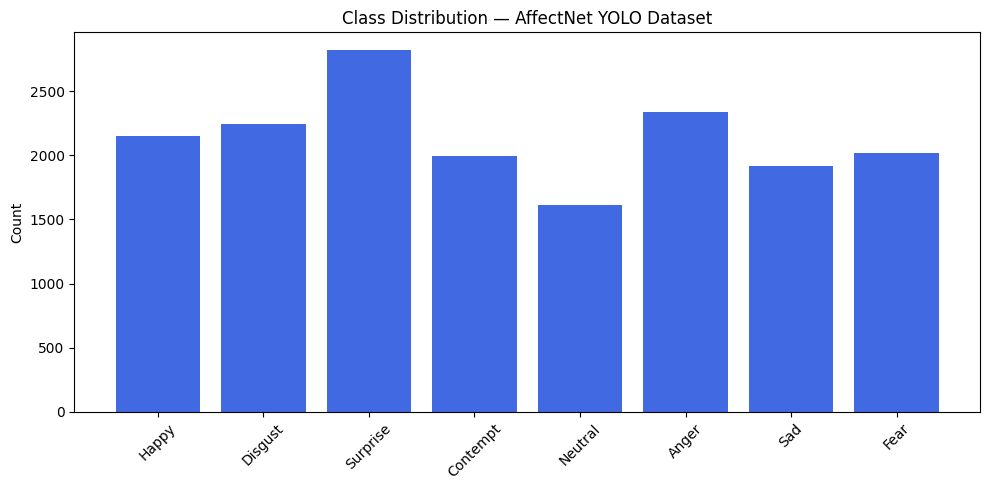

In [11]:
def plot_class_distribution(label_dir=TRAIN_LABEL_DIR):
    counts = Counter()

    for lbl in os.listdir(label_dir):
        if not lbl.endswith(".txt"):
            continue

        with open(os.path.join(label_dir, lbl), "r") as f:
            for line in f:
                cls = int(line.split()[0])
                counts[cls] += 1

    classes = [CLASS_NAMES[c] for c in counts.keys()]
    values = list(counts.values())

    plt.figure(figsize=(10, 5))
    plt.bar(classes, values, color="royalblue")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.title("Class Distribution — AffectNet YOLO Dataset")
    plt.tight_layout()
    plt.show()

plot_class_distribution()